In [34]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [35]:
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# **EDA**

In [36]:
#Duplicates
df[df.duplicated()].sum()

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64

In [37]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [38]:
df["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [39]:
#independent and dependent features
x = df.iloc[:, 1:-1]
y = df.iloc[:,-1]
#split into training and testing
from sklearn.model_selection import train_test_split

# **K nearest neighbour model**

In [40]:
kfold = KFold(n_splits=5)

In [41]:
model = KNeighborsClassifier(n_neighbors=11)

#fitting the model to training data
model.fit(xtrain,ytrain)
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.80952381, 0.8       , 0.85      , 0.65      , 0.7       ])

In [42]:
print(results.mean())

0.7619047619047619


# **Grid Search for Algorithm Tuning**

In [43]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [44]:
n = np.array(range(1,40)) # k value from 1 to 40
params = dict(n_neighbors=n)

In [45]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# **Visualizing the CV results**

In [47]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
15    0.781818
21    0.781818
20    0.781818
18    0.781818
17    0.781818
16    0.781818
19    0.781818
14    0.781818
12    0.781818
11    0.781818
10    0.781818
9     0.781818
8     0.781818
13    0.781818
22    0.771818
23    0.741818
24    0.721818
28    0.702727
30    0.702727
29    0.702727
27    0.702727
26    0.702727
25    0.702727
31    0.692727
32    0.643636
33    0.593636
34    0.593636
35    0.573636
36    0.573636
37    0.573636
38    0.573636
dtype: float64

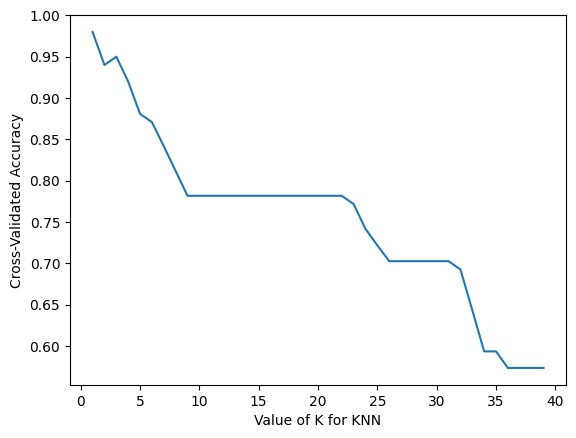

In [48]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# **K nearest neighbour model k=1**

In [49]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, x, y, cv=kfold)
results

array([1.  , 1.  , 1.  , 0.85, 0.9 ])

In [50]:
print(results.mean())

0.95
